In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [34]:
train_data = pd.read_csv("atprice (2).csv", sep=';', encoding='ISO-8859-1')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155178 entries, 0 to 155177
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         155178 non-null  object 
 1   productionDate  155178 non-null  int64  
 2   bodyType        133176 non-null  object 
 3   YearModel       0 non-null       float64
 4   model           155178 non-null  object 
 5   priceEuro       155178 non-null  int64  
 6   fuelType        150406 non-null  object 
 7   color           145599 non-null  object 
 8   transmission    133044 non-null  object 
 9   milage          155178 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 11.8+ MB


In [33]:
train_data.head()


,company,model,transmission,fuelType,milage,car_price
0,Volvo,Volvo Xc90 2.0 D5 AWD,Automatic,Diesel,72100,4.799
1,Volvo,Volvo Xc90 2.0 D5 AWD,Automatic,Diesel,202200,3.490
2,Volvo,Volvo Xc90 2.0,Automatic,Diesel,5,6.990
3,Volvo,Volvo Xc90 2.0,Automatic,Diesel,5,7.790
4,Volvo,Volvo Xc60 2.0 D3,Manual,Diesel,128300,2.249


In [47]:
train_data.isnull().sum()

company         0
model           0
transmission    0
fuelType        0
year            0
milage          0
priceEuro       0
dtype: int64

In [35]:
print("Shape of train data Before dropping any Row: ",train_data.shape)
train_data = train_data[train_data['transmission'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)
train_data = train_data[train_data['fuelType'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",train_data.shape)

Shape of train data Before dropping any Row:  (155178, 10)
Shape of train data After dropping Rows with NULL values in Mileage:  (133044, 10)
Shape of train data After dropping Rows with NULL values in Engine :  (129321, 10)


In [69]:
train_data = train_data.reset_index(drop=True)

In [48]:
train_data['car_prices'] = train_data['priceEuro']/10000

In [53]:
train_data = train_data.rename(columns={"model": "model", "productionDate": "year", 'transmission': 'transmission', 'milage' : 'milage', "car_prices":"car_price"})

In [57]:
train_data.shape

(125874, 7)

In [54]:
train_data = train_data[['company', 'model', 'transmission', 'fuelType', "year",'milage', 'car_price']]

In [39]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'company'] = train_data['model'][i].split()[0]

In [ ]:
train_data = train_data[['year', 'fuelType', 'transmission', 'milage', 'priceEuro']]

In [56]:
test = train_data[['milage',"car_price"]]
z = np.abs(stats.zscore(test))
outliers = np.where(z > 3)
train_data = train_data.drop(train_data.index[outliers[0]])
train_data.shape

In [80]:
train_data.head()

,company,model,transmission,fuelType,year,milage,car_price
0,Volvo,Volvo Xc90 2.0 D5 AWD,Automatic,Diesel,2016,72100,4.799
1,Volvo,Volvo Xc90 2.0 D5 AWD,Automatic,Diesel,2018,202200,3.490
2,Volvo,Volvo Xc90 2.0,Automatic,Diesel,2022,5,6.990
3,Volvo,Volvo Xc90 2.0,Automatic,Diesel,1969,5,7.790
4,Volvo,Volvo Xc60 2.0 D3,Manual,Diesel,2016,128300,2.249


In [79]:
train_data["model"].value_counts()

Volkswagen Golf 1.6 TDI      1620
Audi A4 2.0 TDI              1168
Mercedes Benz C-Class        1110
Bmw 3 Series 320d             978
Volkswagen Passat 2.0 TDI     932
                             ... 
Hyundai Atos 1.1                1
Hyundai Genesis Coupe 3.8       1
Chevrolet Corvette              1
Toyota Corolla 1.3              1
Lexus Nx 2.5 300h               1
Name: model, Length: 3864, dtype: int64

C:\Users\Yerassyl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yerassyl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yerassyl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yerassyl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yerassyl\anaconda3\lib\site-package

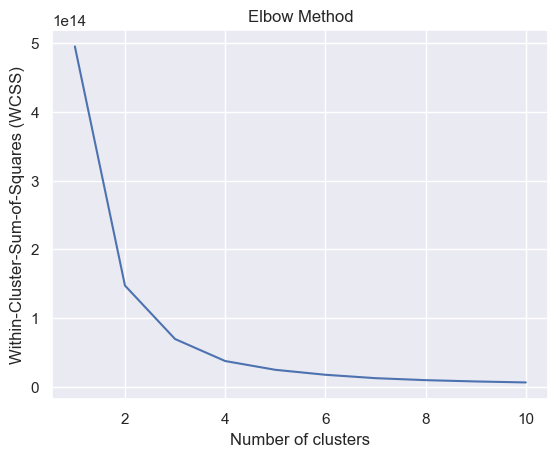

In [85]:
import matplotlib.pyplot as plt

X = df.drop(['car_price', 'company', 'model'], axis=1)

# Create a list to store the WCSS for each number of clusters
wcss = []

# Fit KMeans for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()


In [75]:
clustering_data = train_data[["year", "milage", "car_price"]]

In [ ]:
# Fit the KMeans algorithm to the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(clustering_data)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels back to the original data
df["cluster"] = labels

# Calculate the average car price for each cluster
cluster_averages = df.groupby("cluster").mean()["car_price"]

# Use the cluster averages as a baseline for your price prediction
df["predicted_price"] = df["cluster"].apply(lambda x: cluster_averages[x])

# Save the predictions to a CSV file
df.to_csv("predictions.csv", index=False)


In [82]:
df = pd.get_dummies(train_data, columns=["fuelType", "transmission"])

In [84]:
df

,company,model,year,milage,car_price,fuelType_CNG,fuelType_Diesel,fuelType_Electric,fuelType_Ethanol,fuelType_Hybrid,fuelType_LPG,fuelType_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi Automatic
0,Volvo,Volvo Xc90 2.0 D5 AWD,2016,72100,4.799,0,1,0,0,0,0,0,1,0,0
1,Volvo,Volvo Xc90 2.0 D5 AWD,2018,202200,3.490,0,1,0,0,0,0,0,1,0,0
2,Volvo,Volvo Xc90 2.0,2022,5,6.990,0,1,0,0,0,0,0,1,0,0
3,Volvo,Volvo Xc90 2.0,1969,5,7.790,0,1,0,0,0,0,0,1,0,0
4,Volvo,Volvo Xc60 2.0 D3,2016,128300,2.249,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125869,Volkswagen,Volkswagen Golf 2.0 TDI,2015,187800,1.600,0,1,0,0,0,0,0,0,1,0
125870,Volkswagen,Volkswagen Golf 2.0 TDI,2014,218000,1.290,0,1,0,0,0,0,0,1,0,0
125871,Volkswagen,Volkswagen Golf 2.0 TDI,2016,206000,1.370,0,1,0,0,0,0,0,0,1,0
125872,Volkswagen,Volkswagen Golf 2.0 TDI,2016,80000,3.300,0,1,0,0,0,0,0,0,1,0


In [32]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(train_data.drop("car_price", axis=1))

# Apply k-means clustering to the data
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled)

# Predict the cluster for each car in the dataset
predictions = kmeans.predict(df_scaled)

# Add the cluster predictions to the DataFrame
df["cluster"] = predictions

# Calculate the mean price for each cluster
cluster_mean_prices = df.groupby("cluster").mean()["car_price"]




ValueError: could not convert string to float: 'Volvo'

In [ ]:
# Predict the price of a new car using the mean price of its cluster
new_car = [2016, "Suv", "Volvo Xc90 2.0 D5 AWD", "Diesel", "Automatic", 72100]
new_car_encoded = pd.get_dummies([new_car], columns=["bodyType", "fuelType", "transmission"])
new_car_scaled = scaler.transform(new_car_encoded.drop(7, axis=1))
new_car_cluster = kmeans.predict(new_car_scaled)
new_car_price = cluster_mean_prices[new_car_cluster[0]]